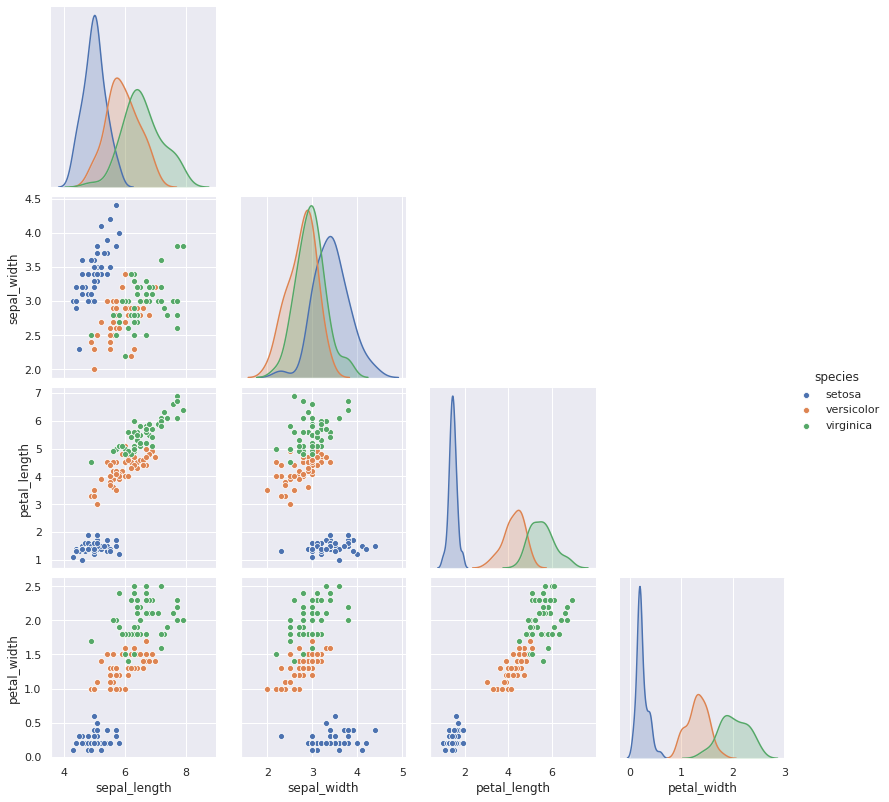

In [14]:
import seaborn as sns; sns.set()

iris = sns.load_dataset('iris')
iris.shape

iris['species'].astype('category').cat.categories.tolist()
Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis='columns')

sns.pairplot(iris, hue="species", diag_kind="kde", height=2.75, corner=True)

from sklearn.model_selection import train_test_split

splits = train_test_split(
    X,
    Y,
    random_state=0,
    stratify=Y
)

X_train, X_test, Y_train, Y_test = splits



In [15]:
from sklearn.decomposition import PCA

#hyperparametre n_components
pca = PCA()

In [16]:
#Calibre le pca
pca.fit(X_train)

PCA()

In [26]:
#Transforme le PCA
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [43]:
#Purement a des fins de visualisation
import pandas as pd
import numpy as np
data_PCA = np.append(X_train_PCA, Y_train.to_numpy().reshape(-1, 1), axis=1)

iris_PCA = pd.DataFrame(
    data=data_PCA,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'TARGET']
)

ValueError: Shape of passed values is (112, 3), indices imply (112, 5)

In [30]:
iris_PCA.head()

,PC1,PC2,PC3,PC4,TARGET
0,-0.541934,-1.266968,-0.220151,-0.006455,1.0
1,-2.738218,-0.158358,-0.211907,0.078717,0.0
2,-2.916185,-0.547301,0.029497,-0.058306,0.0
3,-0.737587,-1.006858,-0.065219,0.001228,1.0
4,0.480884,-1.175354,0.601914,-0.146662,2.0


&lt;seaborn.axisgrid.PairGrid at 0x7efbb509db20&gt;

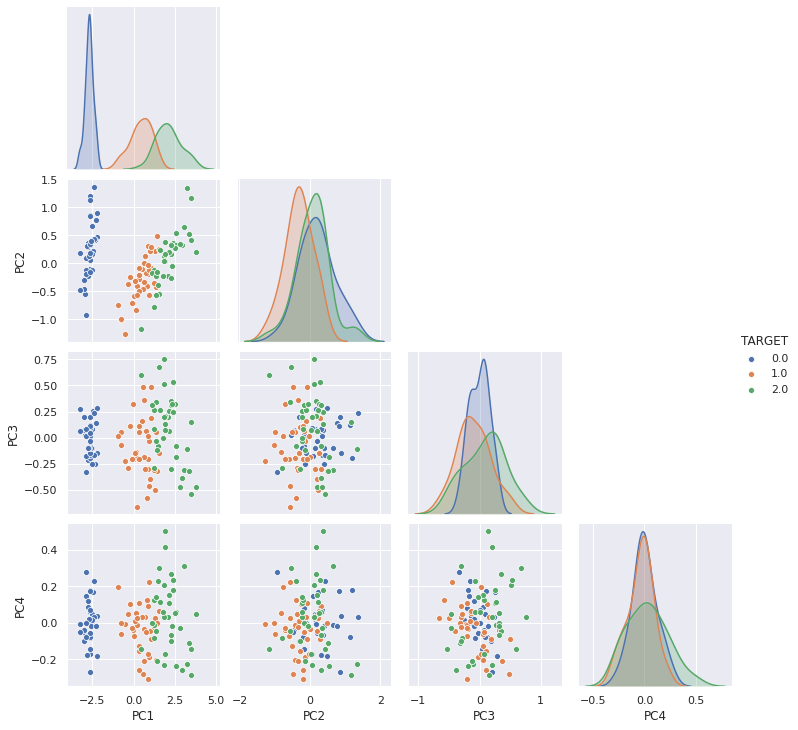

In [31]:
sns.pairplot(iris_PCA, hue='TARGET', corner=True)

In [41]:
#Graphique pour décider quel PC conserver
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1,2,3,4], cumsum)
plt.xlabel("Nombre de composante principale gardée")
plt.ylabel("Cumulative Explained Variance Ratio")

ValueError: arrays must all be same length

In [35]:
pca = PCA(n_components=2)

pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [36]:
X_train_PCA.shape

(112, 2)

In [37]:
X_test_PCA.shape

(38, 2)